In [17]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics, preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras import optimizers, layers, regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

#data = pd.read_csv('Iris.csv')
#data = pd.read_csv('redWine.csv')
data = pd.read_csv('heart.csv')

In [2]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

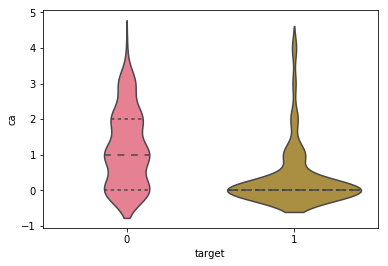

In [3]:
#tmp = data.drop('Id', axis = 1)
#g = sns.pairplot(tmp, hue='quality', markers='+')
#plt.show()

g = sns.violinplot(y='ca', x='target', data=data, inner='quartile')
plt.show()
#g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
#plt.show()
#g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
#plt.show()
#g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
#plt.show()

In [39]:
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

[0.5245901639344263, 0.6229508196721312, 0.639344262295082, 0.6065573770491803, 0.6721311475409836, 0.6721311475409836, 0.6885245901639344, 0.639344262295082, 0.7213114754098361, 0.6557377049180327, 0.6885245901639344, 0.6721311475409836, 0.6885245901639344, 0.6721311475409836, 0.6721311475409836, 0.6229508196721312, 0.6557377049180327, 0.6721311475409836, 0.6721311475409836, 0.6557377049180327, 0.7049180327868853, 0.6557377049180327, 0.6885245901639344, 0.6557377049180327, 0.6721311475409836, 0.639344262295082, 0.6721311475409836, 0.6557377049180327, 0.6721311475409836, 0.639344262295082, 0.6721311475409836, 0.639344262295082, 0.6721311475409836, 0.6721311475409836, 0.6885245901639344, 0.6721311475409836, 0.6885245901639344, 0.6721311475409836, 0.6721311475409836, 0.6557377049180327, 0.6721311475409836, 0.6557377049180327, 0.7049180327868853, 0.7049180327868853, 0.7377049180327869, 0.7049180327868853, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853, 0.7213114754098361]


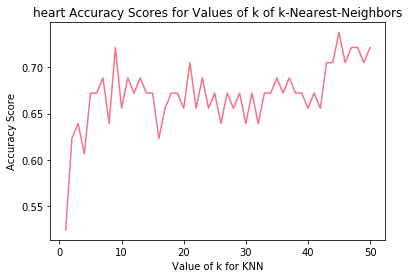

In [41]:
# K-NEAREST NEIGHBOR
k_range = list(range(1,51))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('heart Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.savefig('heartknn')
print(scores)


training time:  0.0009996891021728516 

prediction time:  0.0019996166229248047 



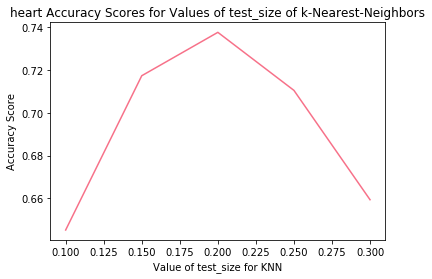

In [42]:
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    knn = KNeighborsClassifier(n_neighbors=45)
    t1 = time.time()
    knn.fit(X_train, y_train)
    t2 = time.time()
    y_pred = knn.predict(X_test)
    t3 = time.time()
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for KNN')
plt.ylabel('Accuracy Score')
plt.title('heart Accuracy Scores for Values of test_size of k-Nearest-Neighbors')
plt.savefig('heartknnlearning')
print("training time: ", t2-t1, "\n")
print("prediction time: ", t3-t2, "\n")

In [27]:
# SUPPORT VECTOR MACHINE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
clf = SVC(kernel='linear')
t1 = time.time()
clf.fit(X_train,y_train)
t2 = time.time()
y_pred = clf.predict(X_test)
t3 = time.time()
print(accuracy_score(y_test,y_pred))
print("training time: ", t2-t1, "\n")
print("prediction time: ", t3-t2, "\n")

0.819672131147541
training time:  0.27098941802978516 

prediction time:  0.0 



In [29]:
clf = SVC(kernel='rbf', gamma='auto')
t1 = time.time()
clf.fit(X_train,y_train)
t2 = time.time()
y_pred = clf.predict(X_test)
t3 = time.time()
print(accuracy_score(y_test,y_pred))
print("training time: ", t2-t1, "\n")
print("prediction time: ", t3-t2, "\n")

0.4918032786885246
training time:  0.004000186920166016 

prediction time:  0.0009999275207519531 



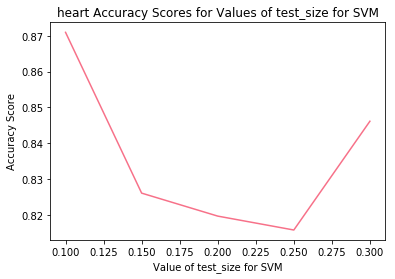

In [43]:
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    clf = SVC(kernel='linear', gamma='auto')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for SVM')
plt.ylabel('Accuracy Score')
plt.title('heart Accuracy Scores for Values of test_size for SVM')
plt.savefig('heartsvm')

[78.02, 77.63, 81.97, 69.57, 70.97]


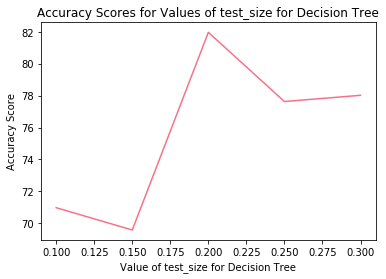

In [44]:
# DECISION TREES WITH PRUNING
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    decision_tree = DecisionTreeClassifier(random_state=0)
    decision_tree.fit(X_train, y_train)
    #acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
    #print(acc_decision_tree)
    acc_test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
    scores.append(acc_test_decision_tree)
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for Decision Tree')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of test_size for Decision Tree') 
plt.savefig('heartdtlearning')
print(scores)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(len(ccp_alphas))

26


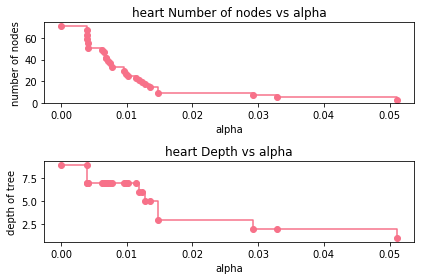

In [46]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("heart Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("heart Depth vs alpha")
fig.tight_layout()

new max accuracy with pruning:  0.819672131147541


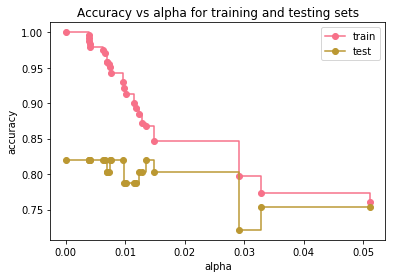

In [47]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.savefig('heart pruning')
print("new max accuracy with pruning: ",max(test_scores))

[81.32, 82.89, 83.61, 82.61, 90.32]


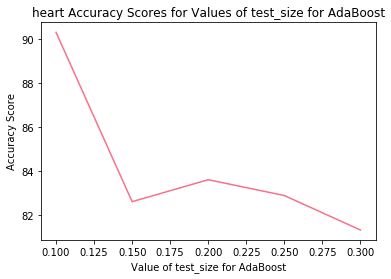

In [48]:
# ADABOOST
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    clf = AdaBoostClassifier(algorithm='SAMME.R', n_estimators=100, random_state=0, learning_rate=0.05, 
                             base_estimator=None)
    clf.fit(X_train, y_train)
    #acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
    #print(acc_decision_tree)
    acc_test_boosting = round(clf.score(X_test, y_test) * 100, 2)
    scores.append(acc_test_boosting)
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for AdaBoost')
plt.ylabel('Accuracy Score')
plt.title('heart Accuracy Scores for Values of test_size for AdaBoost') 
plt.savefig('heartboosttest')
print(scores)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2]
[85.25, 85.25, 83.61, 81.97, 83.61, 85.25, 85.25, 81.97, 80.33, 80.33, 80.33, 80.33, 80.33, 78.69, 77.05, 77.05, 77.05, 77.05, 75.41, 77.05]


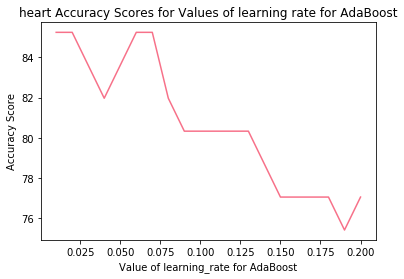

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
learning_range = list(np.linspace(0.01, 0.2, num=20))
scores = []
for rate in learning_range:
    clf = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=rate)
    clf.fit(X_train, y_train)
    acc_test_boosting = round(clf.score(X_test, y_test) * 100, 2)
    scores.append(acc_test_boosting)
plt.plot(learning_range, scores)
plt.xlabel('Value of learning_rate for AdaBoost')
plt.ylabel('Accuracy Score')
plt.title('heart Accuracy Scores for Values of learning rate for AdaBoost') 
plt.savefig('heartboostlearning')
print(learning_range)
print(scores)

In [50]:
# NEURAL NETWORK


In [19]:
def build_ann(optimizer='adam'):
    
    # Initializing the ANN
    ann = Sequential()
    
    # Adding the input layer and the first hidden layer of the ANN with dropout
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(len(X_train.columns),)))
    
    # Add other layers, it is not necessary to pass the shape because there is a layer before
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    
    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compiling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

In [20]:
opt = optimizers.Adam(lr=0.0005)
ann = build_ann(opt)
# Training the ANN
history = ann.fit(X_train, y_train, batch_size=16, epochs=200, validation_data=(X_test, y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 3ms/step - loss: 7.8510 - acc: 0.4752 - val_loss: 7.8720 - val_acc: 0.5082
Epoch 2/200
242/242 [==============================] - 0s 215us/step - loss: 8.1350 - acc: 0.4339 - val_loss: 3.1412 - val_acc: 0.5082
Epoch 3/200
242/242 [==============================] - 0s 211us/step - loss: 7.4383 - acc: 0.4587 - val_loss: 2.0087 - val_acc: 0.4918
Epoch 4/200
242/242 [==============================] - 0s 215us/step - loss: 6.6133 - acc: 0.5083 - val_loss: 0.8336 - val_acc: 0.3934
Epoch 5/200
242/242 [==============================] - 0s 198us/step - loss: 6.8336 - acc: 0.4876 - val_loss: 1.8611 - val_acc: 0.5082
Epoch 6/200
242/242 [==============================] - 0s 202us/step - loss: 6.7023 - acc: 0.4917 - val_loss: 0.8028 - val_acc: 0.5738
Epoch 7/200
242/242 [==============================] - 0s 198us/step - loss: 6.4792 - acc: 0.4917 - val_loss: 0.9260 - val_acc: 0.6230
Epoch 8/200


Epoch 61/200
242/242 [==============================] - 0s 219us/step - loss: 0.6795 - acc: 0.5744 - val_loss: 0.6189 - val_acc: 0.7049
Epoch 62/200
242/242 [==============================] - 0s 211us/step - loss: 0.6908 - acc: 0.5992 - val_loss: 0.6243 - val_acc: 0.7213
Epoch 63/200
242/242 [==============================] - 0s 223us/step - loss: 0.6820 - acc: 0.6364 - val_loss: 0.6282 - val_acc: 0.7213
Epoch 64/200
242/242 [==============================] - 0s 215us/step - loss: 0.6645 - acc: 0.6198 - val_loss: 0.6366 - val_acc: 0.6885
Epoch 65/200
242/242 [==============================] - 0s 211us/step - loss: 0.6062 - acc: 0.6653 - val_loss: 0.6255 - val_acc: 0.7049
Epoch 66/200
242/242 [==============================] - 0s 198us/step - loss: 0.6102 - acc: 0.6818 - val_loss: 0.6131 - val_acc: 0.7541
Epoch 67/200
242/242 [==============================] - 0s 207us/step - loss: 0.6092 - acc: 0.6322 - val_loss: 0.6046 - val_acc: 0.6721
Epoch 68/200
242/242 [==========================

242/242 [==============================] - 0s 227us/step - loss: 0.5954 - acc: 0.6818 - val_loss: 0.5687 - val_acc: 0.7377
Epoch 122/200
242/242 [==============================] - 0s 236us/step - loss: 0.5749 - acc: 0.6860 - val_loss: 0.5657 - val_acc: 0.7541
Epoch 123/200
242/242 [==============================] - 0s 207us/step - loss: 0.5460 - acc: 0.6901 - val_loss: 0.5599 - val_acc: 0.7377
Epoch 124/200
242/242 [==============================] - 0s 202us/step - loss: 0.5674 - acc: 0.6694 - val_loss: 0.5754 - val_acc: 0.7377
Epoch 125/200
242/242 [==============================] - 0s 207us/step - loss: 0.5790 - acc: 0.6777 - val_loss: 0.5695 - val_acc: 0.7377
Epoch 126/200
242/242 [==============================] - 0s 202us/step - loss: 0.5645 - acc: 0.6818 - val_loss: 0.5917 - val_acc: 0.7541
Epoch 127/200
242/242 [==============================] - 0s 211us/step - loss: 0.5843 - acc: 0.6860 - val_loss: 0.5836 - val_acc: 0.7213
Epoch 128/200
242/242 [==============================] 

Epoch 181/200
242/242 [==============================] - 0s 202us/step - loss: 0.5300 - acc: 0.7190 - val_loss: 0.5159 - val_acc: 0.7869
Epoch 182/200
242/242 [==============================] - 0s 202us/step - loss: 0.5206 - acc: 0.7355 - val_loss: 0.5242 - val_acc: 0.7377
Epoch 183/200
242/242 [==============================] - 0s 207us/step - loss: 0.5027 - acc: 0.7231 - val_loss: 0.5225 - val_acc: 0.7705
Epoch 184/200
242/242 [==============================] - 0s 198us/step - loss: 0.5530 - acc: 0.6736 - val_loss: 0.5429 - val_acc: 0.7377
Epoch 185/200
242/242 [==============================] - 0s 207us/step - loss: 0.5443 - acc: 0.6901 - val_loss: 0.5408 - val_acc: 0.7213
Epoch 186/200
242/242 [==============================] - 0s 198us/step - loss: 0.4943 - acc: 0.7149 - val_loss: 0.5665 - val_acc: 0.7213
Epoch 187/200
242/242 [==============================] - 0s 207us/step - loss: 0.5811 - acc: 0.6364 - val_loss: 0.5905 - val_acc: 0.7213
Epoch 188/200
242/242 [==================

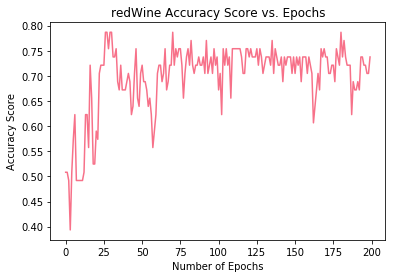

In [21]:
plt.plot(history.history['val_acc'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('redWine Accuracy Score vs. Epochs') 
plt.show()
#plt.savefig('test.png')

In [23]:
nndata = pd.read_csv("heart.csv")
nndata["target"] =nndata["target"].astype(int)
nndata = pd.get_dummies(nndata, columns=["target"])
X = nndata.iloc[:,0:13].values # first columns
Y = nndata.iloc[:,13:].values # last columns
X = preprocessing.normalize(X, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(242, 13) (242, 2) (61, 13) (61, 2)


In [30]:
def build_ann(optimizer='adam'):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=13))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(2, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.00005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)

In [31]:
history = ann.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/200
242/242 [==============================] - 1s 6ms/step - loss: 1.0673 - categorical_accuracy: 0.5041 - val_loss: 0.8926 - val_categorical_accuracy: 0.4590
Epoch 2/200
242/242 [==============================] - 0s 157us/step - loss: 1.0231 - categorical_accuracy: 0.5289 - val_loss: 0.8818 - val_categorical_accuracy: 0.4590
Epoch 3/200
242/242 [==============================] - 0s 149us/step - loss: 1.1075 - categorical_accuracy: 0.4545 - val_loss: 0.8774 - val_categorical_accuracy: 0.4754
Epoch 4/200
242/242 [==============================] - 0s 140us/step - loss: 1.0068 - categorical_accuracy: 0.5455 - val_loss: 0.8687 - val_categorical_accuracy: 0.4918
Epoch 5/200
242/242 [==============================] - 0s 136us/step - loss: 1.1322 - categorical_accuracy: 0.4711 - val_loss: 0.8630 - val_categorical_accuracy: 0.5082
Epoch 6/200
242/242 [==============================] - 0s 136us/step - loss: 1.0061 - categorical_accuracy: 0.53

Epoch 49/200
242/242 [==============================] - 0s 145us/step - loss: 0.8066 - categorical_accuracy: 0.6736 - val_loss: 0.6750 - val_categorical_accuracy: 0.7705
Epoch 50/200
242/242 [==============================] - 0s 132us/step - loss: 0.8856 - categorical_accuracy: 0.6322 - val_loss: 0.6729 - val_categorical_accuracy: 0.7705
Epoch 51/200
242/242 [==============================] - 0s 136us/step - loss: 0.8586 - categorical_accuracy: 0.6322 - val_loss: 0.6710 - val_categorical_accuracy: 0.7705
Epoch 52/200
242/242 [==============================] - 0s 132us/step - loss: 0.8295 - categorical_accuracy: 0.6322 - val_loss: 0.6693 - val_categorical_accuracy: 0.7705
Epoch 53/200
242/242 [==============================] - 0s 132us/step - loss: 0.8702 - categorical_accuracy: 0.6116 - val_loss: 0.6675 - val_categorical_accuracy: 0.7705
Epoch 54/200
242/242 [==============================] - 0s 136us/step - loss: 0.8520 - categorical_accuracy: 0.6157 - val_loss: 0.6656 - val_categoric

242/242 [==============================] - 0s 132us/step - loss: 0.7697 - categorical_accuracy: 0.7066 - val_loss: 0.6178 - val_categorical_accuracy: 0.8033
Epoch 98/200
242/242 [==============================] - 0s 128us/step - loss: 0.7289 - categorical_accuracy: 0.7149 - val_loss: 0.6172 - val_categorical_accuracy: 0.8033
Epoch 99/200
242/242 [==============================] - 0s 136us/step - loss: 0.7756 - categorical_accuracy: 0.7562 - val_loss: 0.6164 - val_categorical_accuracy: 0.8033
Epoch 100/200
242/242 [==============================] - 0s 128us/step - loss: 0.7589 - categorical_accuracy: 0.6777 - val_loss: 0.6157 - val_categorical_accuracy: 0.8033
Epoch 101/200
242/242 [==============================] - 0s 136us/step - loss: 0.7215 - categorical_accuracy: 0.7107 - val_loss: 0.6151 - val_categorical_accuracy: 0.8033
Epoch 102/200
242/242 [==============================] - 0s 136us/step - loss: 0.7391 - categorical_accuracy: 0.7314 - val_loss: 0.6149 - val_categorical_accurac

242/242 [==============================] - 0s 128us/step - loss: 0.6543 - categorical_accuracy: 0.7397 - val_loss: 0.5991 - val_categorical_accuracy: 0.8197
Epoch 146/200
242/242 [==============================] - 0s 132us/step - loss: 0.7403 - categorical_accuracy: 0.6777 - val_loss: 0.5989 - val_categorical_accuracy: 0.8197
Epoch 147/200
242/242 [==============================] - 0s 132us/step - loss: 0.6683 - categorical_accuracy: 0.7397 - val_loss: 0.5988 - val_categorical_accuracy: 0.8197
Epoch 148/200
242/242 [==============================] - 0s 136us/step - loss: 0.7519 - categorical_accuracy: 0.7025 - val_loss: 0.5986 - val_categorical_accuracy: 0.8197
Epoch 149/200
242/242 [==============================] - 0s 136us/step - loss: 0.6352 - categorical_accuracy: 0.7851 - val_loss: 0.5984 - val_categorical_accuracy: 0.8197
Epoch 150/200
242/242 [==============================] - 0s 132us/step - loss: 0.7473 - categorical_accuracy: 0.7025 - val_loss: 0.5982 - val_categorical_accur

Epoch 193/200
242/242 [==============================] - 0s 128us/step - loss: 0.6327 - categorical_accuracy: 0.7603 - val_loss: 0.5870 - val_categorical_accuracy: 0.8033
Epoch 194/200
242/242 [==============================] - 0s 132us/step - loss: 0.6573 - categorical_accuracy: 0.7521 - val_loss: 0.5868 - val_categorical_accuracy: 0.8033
Epoch 195/200
242/242 [==============================] - 0s 136us/step - loss: 0.6549 - categorical_accuracy: 0.7479 - val_loss: 0.5865 - val_categorical_accuracy: 0.8033
Epoch 196/200
242/242 [==============================] - 0s 136us/step - loss: 0.6846 - categorical_accuracy: 0.7314 - val_loss: 0.5860 - val_categorical_accuracy: 0.8033
Epoch 197/200
242/242 [==============================] - 0s 128us/step - loss: 0.6913 - categorical_accuracy: 0.7727 - val_loss: 0.5857 - val_categorical_accuracy: 0.8033
Epoch 198/200
242/242 [==============================] - 0s 128us/step - loss: 0.6652 - categorical_accuracy: 0.7438 - val_loss: 0.5856 - val_cat

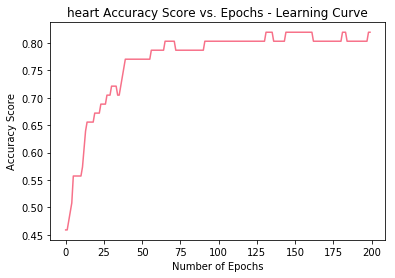

In [36]:
plt.plot(history.history['val_categorical_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('heart Accuracy Score vs. Epochs - Learning Curve') 
#plt.show()
plt.savefig('heartANNlearningCurve.png')